#### **Integração Numérica - Método dos trapézios**

In [2]:
import numpy as np 
import pandas as pd
import sympy as sp 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 51) 

Resolvendo a integral

$$
\int_{0}^{1} \frac{4}{1 + x^2} \, dt
$$


entrada

In [3]:
a, b = 0, 1 
n_trapezios = 400
n_casas_decimais = 6

dom = np.linspace(a, b, n_trapezios+1)
img = 4 /( 1 + np.square(dom))

soma das áreas

In [4]:
h = (b - a) / (n_trapezios)
soma = img[0] + 2 * np.sum(img[1:-1]) + img[-1]
area = soma * h/2

print(f'Área aproximada: {area:.{n_casas_decimais}f}')

Área aproximada: 3.141592


tabela

In [5]:
tabela = pd.DataFrame({'x': dom, 'f(x)': np.around(img, n_casas_decimais)})
tabela


,x,f(x)
0,0.0000,4.000000
1,0.0025,3.999975
2,0.0050,3.999900
3,0.0075,3.999775
4,0.0100,3.999600
...,...,...
396,0.9900,2.020100
397,0.9925,2.015056
398,0.9950,2.010025
399,0.9975,2.005006


erro de arredondamento

In [6]:
decimal = 5 / (10 ** (n_casas_decimais + 1) )
erro_arr = n_trapezios * decimal * h

form = '.2e' if erro_arr < 0.00001 else f'.{n_casas_decimais}f'
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_arr:{form}})'
intervalo2 =  f'[{area - erro_arr:.{n_casas_decimais}f} ; {area+erro_arr:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(3.141592 ± 5.00e-07)

[3.141591 ; 3.141592]


gráfico

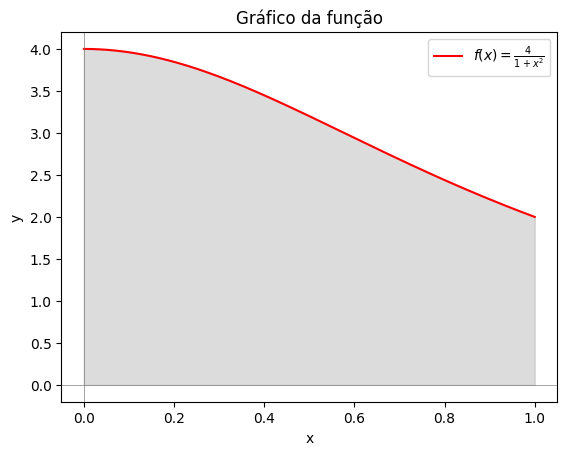

In [7]:
plt.plot(dom, img, label= r'$f(x) = \frac{4}{1 + x^2} $', color='red')

plt.fill_between(dom, img, color='darkgrey', alpha=0.4, ) 
plt.title('Gráfico da função')

plt.xlabel('x'); plt.ylabel('y')
plt.axhline(0, color='gray',linewidth=0.5)  
plt.axvline(0, color='gray',linewidth=0.5) 

plt.legend(loc='upper right')

plt.show()


erro de truncamento

In [8]:
x = sp.Symbol('x')
out = sp.diff(sp.diff(4 / (1 + x**2)))
function = sp.lambdify(x, out)

erro_trunc = (h**3) / (n_trapezios * 12) * max(abs(function(a)), abs(function(b)))
form = '.2e' if erro_trunc < 0.00001 else f'.{n_casas_decimais}f'

print(f'{erro_trunc:{form}}')

2.60e-11


erro Total

In [9]:
erro_total = erro_arr + erro_trunc

form = '.2e' if erro_total < 0.00001 else f'.{n_casas_decimais}f'
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_total:{form}})'
intervalo2 =  f'[{area - erro_total:.{n_casas_decimais}f} ; {area+erro_total:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(3.141592 ± 5.00e-07)

[3.141591 ; 3.141592]
